In [15]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Data/sales.csv')

# 년분기별, 업종별 매출금액 합산
sales_summary = data.groupby(['기준_년분기_코드', '서비스_업종_코드_명'])['당월_매출_금액'].sum().reset_index()

# 피벗 테이블 생성
pivot_table = sales_summary.pivot(index='서비스_업종_코드_명', columns='기준_년분기_코드', values='당월_매출_금액')

# NaN 값을 0으로 대체
pivot_table = pivot_table.fillna(0)

# 각 업종의 총 매출액 계산
pivot_table['총_매출액'] = pivot_table.sum(axis=1)

# 총 매출액 기준으로 내림차순 정렬
pivot_table = pivot_table.sort_values('총_매출액', ascending=False)

# 결과 출력
pd.set_option('display.max_rows', None)  # 모든 행 표시
pd.set_option('display.max_columns', None)  # 모든 열 표시
pd.set_option('display.width', None)  # 너비 제한 해제
pd.set_option('display.max_colwidth', None)  # 열 너비 제한 해제

print(pivot_table)



기준_년분기_코드             20191          20192          20193          20194  \
서비스_업종_코드_명                                                                
한식음식점         2379968714935  2534476998489  2558209358943  2898347277241   
일반의류          1707096520599  1812643498977  1675042374707  1985273803157   
의약품           1040295013443  1136897377421  1158032180484  1218059639497   
일반의원          1103349889260  1125467349002  1128689733357  1298409907740   
편의점            852037456880   983212875262  1040806093948  1012174880713   
컴퓨터및주변장치판매    1367463150659  1093488253899  1105147893469  1208682559291   
수산물판매          655203939839   543015279548   562102429311   888072642388   
슈퍼마켓           809912387715   843398964214   866664951999   847413977607   
화장품            884011547140   902289873389   890751077010   923186399867   
육류판매           625950630471   511655140858   648884128801   614064035638   
반찬가게           573499556283   600038968143   601959897760   667929352891   
청과상         

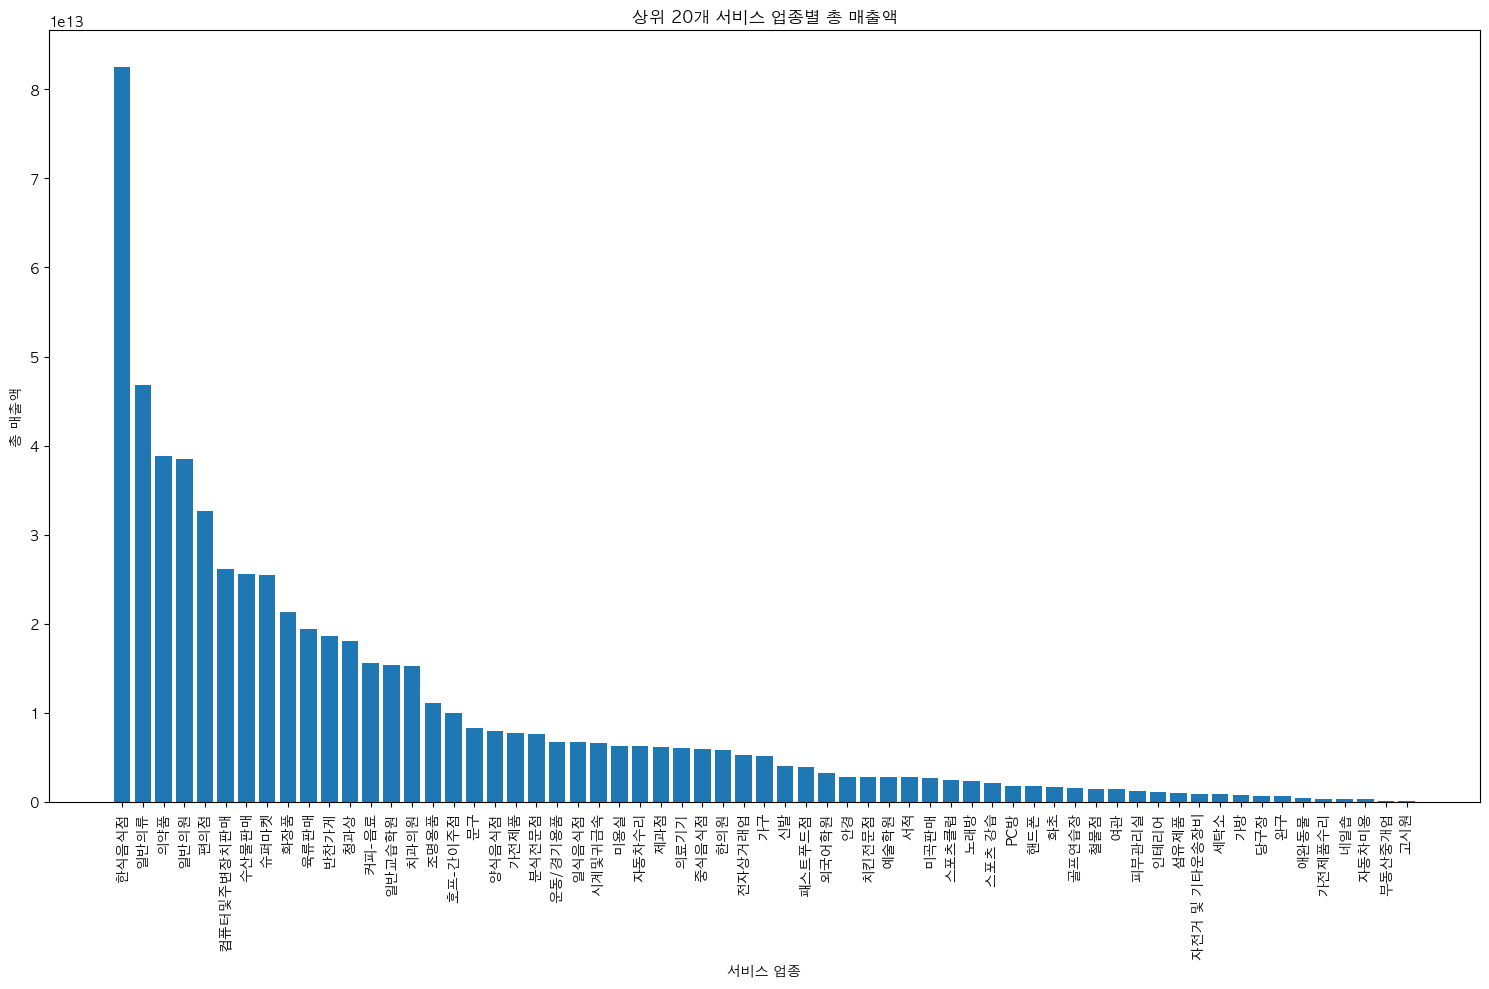

In [14]:
# 시각화 (상위 70개 업종만)
top_70 = pivot_table.head(70)

plt.figure(figsize=(15, 10))
plt.bar(top_70.index, top_70['총_매출액'])
plt.xticks(rotation=90)
plt.xlabel('서비스 업종')
plt.ylabel('총 매출액')
plt.title('상위 70개 서비스 업종별 총 매출액')
plt.tight_layout()
plt.show()


In [13]:
data.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,자치구_코드,자치구_명
0,20191,11320511,창1동,CS300027,섬유제품,29845104,395,27048154,2796950,888443,1974318,16913323,2237560,5034510,2796950,0,0,13491172,12833065,658106,2862761,0,921348,28923756,0,0,3060192,658106,19150883,6975923,296,99,33,33,98,66,66,99,0,0,66,197,33,99,0,33,362,0,0,99,33,131,132,11320,도봉구
1,20191,11170630,이촌1동,CS100007,치킨전문점,524129397,17164,352775199,171354198,58398469,72946058,73746460,57699272,89984940,89830249,81523949,29738639,0,9237256,33339970,240615441,211198091,260178354,185329330,8227946,42554723,82865784,133256762,129241747,49360720,11282,5882,1770,2281,2267,1984,2980,3007,2875,830,0,332,1262,8646,6094,8696,6744,378,1506,2806,4662,4345,1743,11170,용산구
2,20191,11170630,이촌1동,CS300006,미곡판매,6057113,117,4925335,1131778,859314,796437,2850406,209589,209589,1131778,0,0,733560,1299451,2934241,1089861,0,3563008,2326434,0,272465,2515064,1592875,419177,1089861,92,25,16,17,47,4,8,25,0,0,21,34,37,25,0,54,58,0,8,42,38,4,20,11170,용산구
3,20191,11170640,이촌2동,CS100001,한식음식점,74852597,5317,56607310,18245287,12281935,10560766,9617646,10882863,13264100,11653843,6591444,10084606,1235258,19444904,10959744,21189170,11938915,52182559,15959907,205176,5449760,14825375,14543866,17592623,15525670,4469,848,882,754,939,937,957,655,193,263,134,2118,837,1560,405,4005,864,19,272,730,830,1321,1697,11170,용산구
4,20191,11170650,이태원1동,CS300010,반찬가게,187986363,5740,112992392,74993971,18410757,20056643,19711372,20641692,34171928,36117812,38876159,570714,10052859,33940609,48861837,66829216,27731128,118050480,54969883,495944,32547763,71916170,43019398,19538555,5502535,3483,2257,567,669,602,610,1035,1173,1084,31,198,974,1505,2075,957,3699,1775,24,1478,2231,1036,538,167,11170,용산구


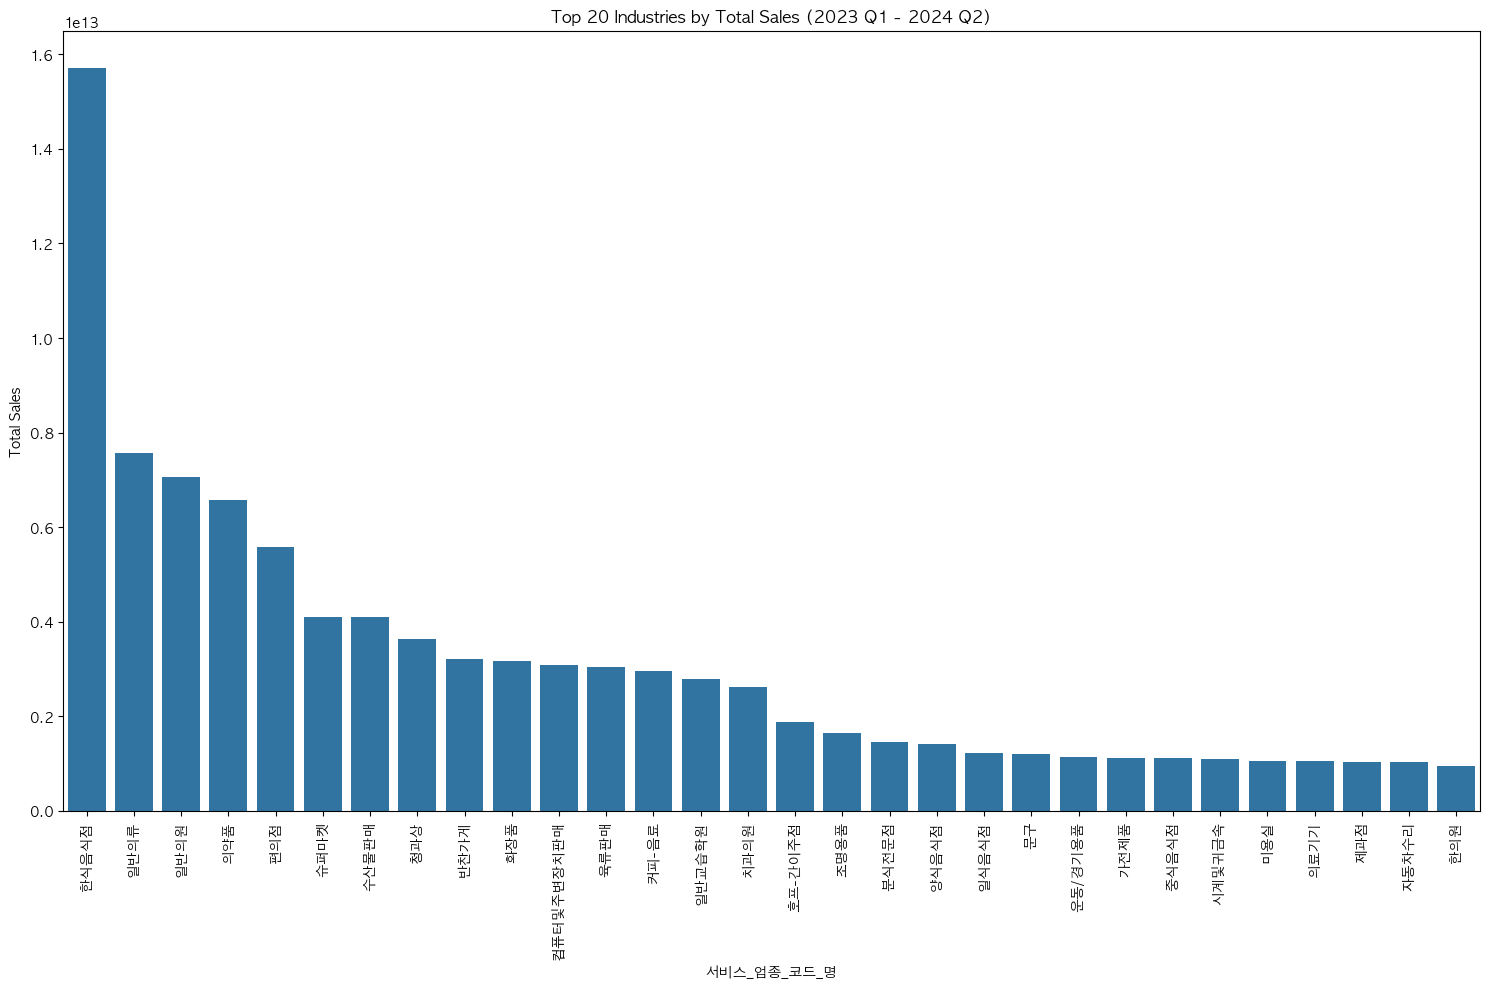

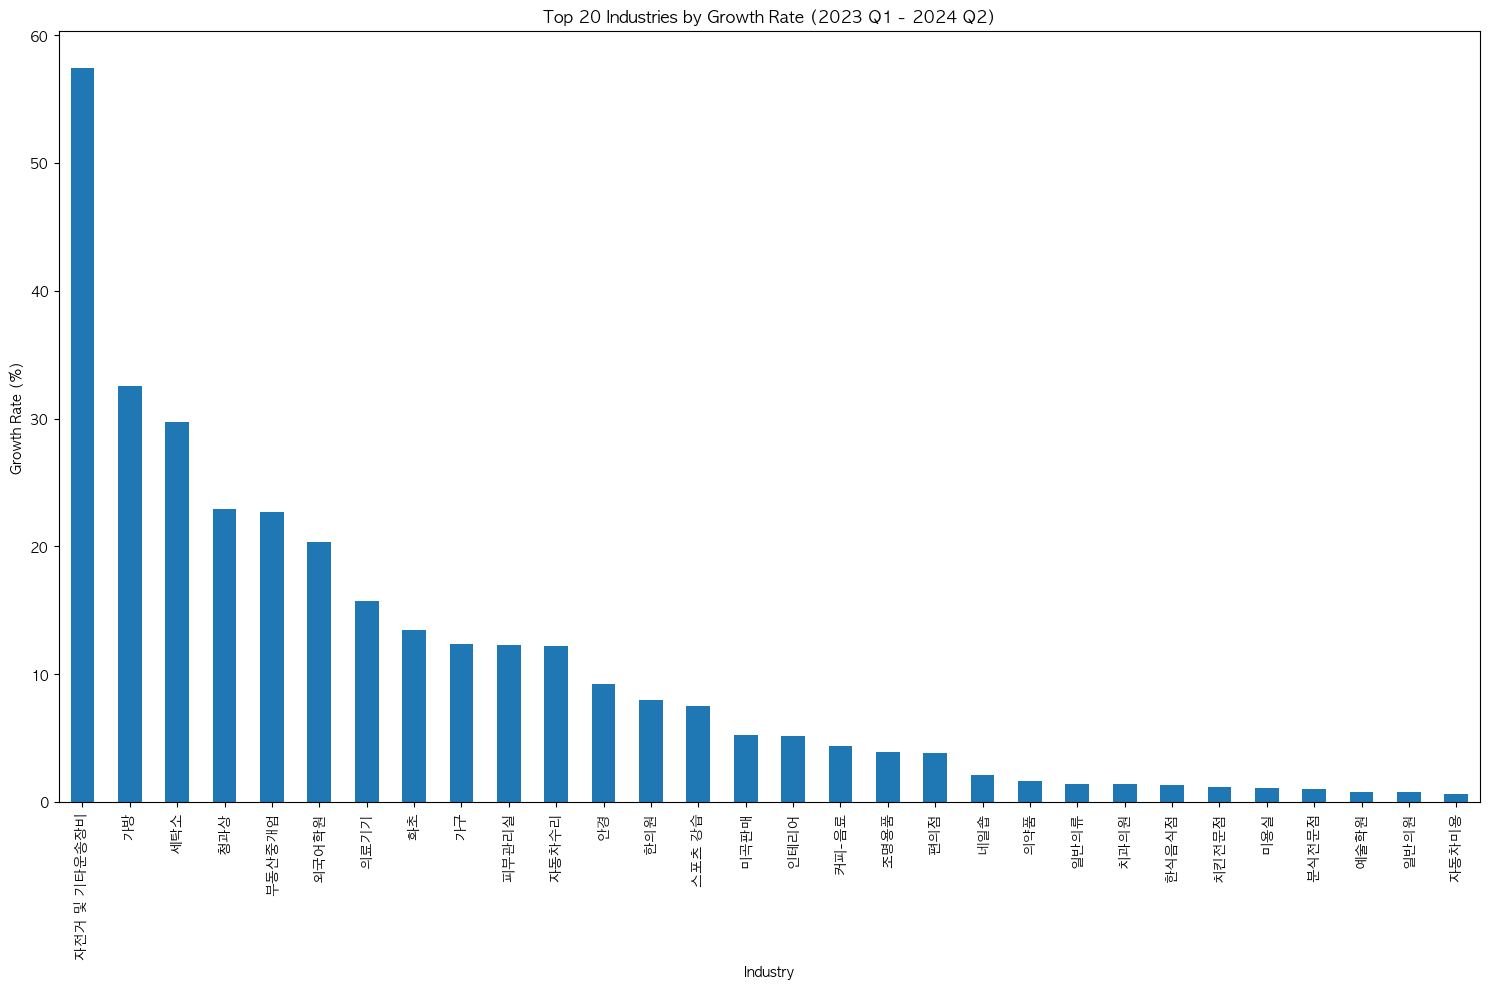

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# 기준_년분기_코드를 문자열로 변환
data['기준_년분기_코드'] = data['기준_년분기_코드'].astype(str)

# 연도와 분기 분리
data['연도'] = data['기준_년분기_코드'].str[:4].astype(int)
data['분기'] = data['기준_년분기_코드'].str[4:].astype(int)

# 2023년 1분기부터 2024년 2분기까지의 데이터 필터링
recent_data = data[(data['연도'] >= 2023) & (data['연도'] <= 2024) & (data['분기'] <= 2)]

# 업종별 총 매출액 계산
total_sales = recent_data.groupby('서비스_업종_코드_명')['당월_매출_금액'].sum().sort_values(ascending=False)

# 업종별 성장률 계산
first_quarter = recent_data[(recent_data['연도'] == 2023) & (recent_data['분기'] == 1)].groupby('서비스_업종_코드_명')['당월_매출_금액'].sum()
last_quarter = recent_data[(recent_data['연도'] == 2024) & (recent_data['분기'] == 2)].groupby('서비스_업종_코드_명')['당월_매출_금액'].sum()

# 성장률 계산 시 오류 처리
growth_rate = pd.DataFrame({'성장률': ((last_quarter - first_quarter) / first_quarter * 100)})
growth_rate = growth_rate.replace([np.inf, -np.inf], np.nan).dropna()
growth_rate = growth_rate.sort_values('성장률', ascending=False)

# 상위 30개 업종 선정
top_30_sales = total_sales.head(30)
top_30_growth = growth_rate.head(30)

# 매출액 기준 상위 30개 업종 시각화
plt.figure(figsize=(15, 10))
sns.barplot(x=top_30_sales.index, y=top_30_sales.values)
plt.title('Top 30 Industries by Total Sales (2023 Q1 - 2024 Q2)')
plt.xticks(rotation=90)
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# 성장률 기준 상위 30개 업종 시각화
plt.figure(figsize=(15, 10))
top_30_growth['성장률'].plot(kind='bar')
plt.title('Top 30 Industries by Growth Rate (2023 Q1 - 2024 Q2)')
plt.xlabel('Industry')
plt.ylabel('Growth Rate (%)')
plt.xticks(range(len(top_30_growth.index)), top_30_growth.index, rotation=90)
plt.tight_layout()
plt.show()


In [27]:
top_30_sales


서비스_업종_코드_명
한식음식점         15709087174402
일반의류           7562526692337
일반의원           7057040034033
의약품            6565914376444
편의점            5575002927739
슈퍼마켓           4104521933481
수산물판매          4099461851895
청과상            3625614560776
반찬가게           3213657329131
화장품            3167969509273
컴퓨터및주변장치판매     3082582360474
육류판매           3053091727724
커피-음료          2961624134145
일반교습학원         2783346801275
치과의원           2621975534167
호프-간이주점        1890295285439
조명용품           1648552904424
분식전문점          1463983983839
양식음식점          1413725841277
일식음식점          1235235817754
문구             1209234000138
운동/경기용품        1135619592012
가전제품           1121450216445
중식음식점          1110220058523
시계및귀금속         1098069011678
미용실            1065102643581
의료기기           1049948895990
제과점            1033721327884
자동차수리          1026993503429
한의원             959603351121
Name: 당월_매출_금액, dtype: int64

In [28]:
top_30_growth

,성장률
서비스_업종_코드_명,
자전거 및 기타운송장비,57.463582
가방,32.531950
세탁소,29.765256
청과상,22.889490
부동산중개업,22.678228
외국어학원,20.377335
의료기기,15.741183
화초,13.485608
가구,12.347593


<Figure size 2200x1500 with 0 Axes>

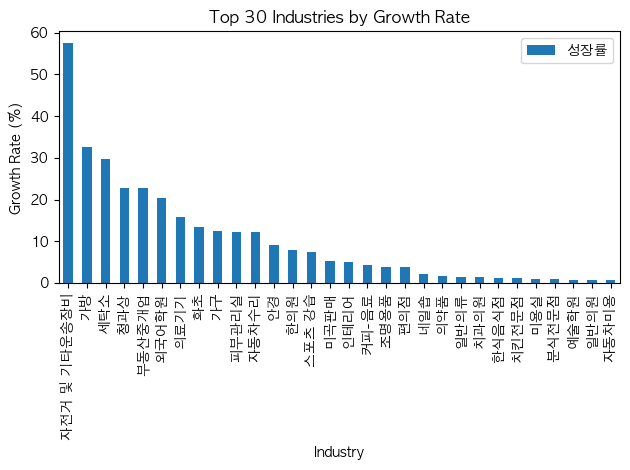

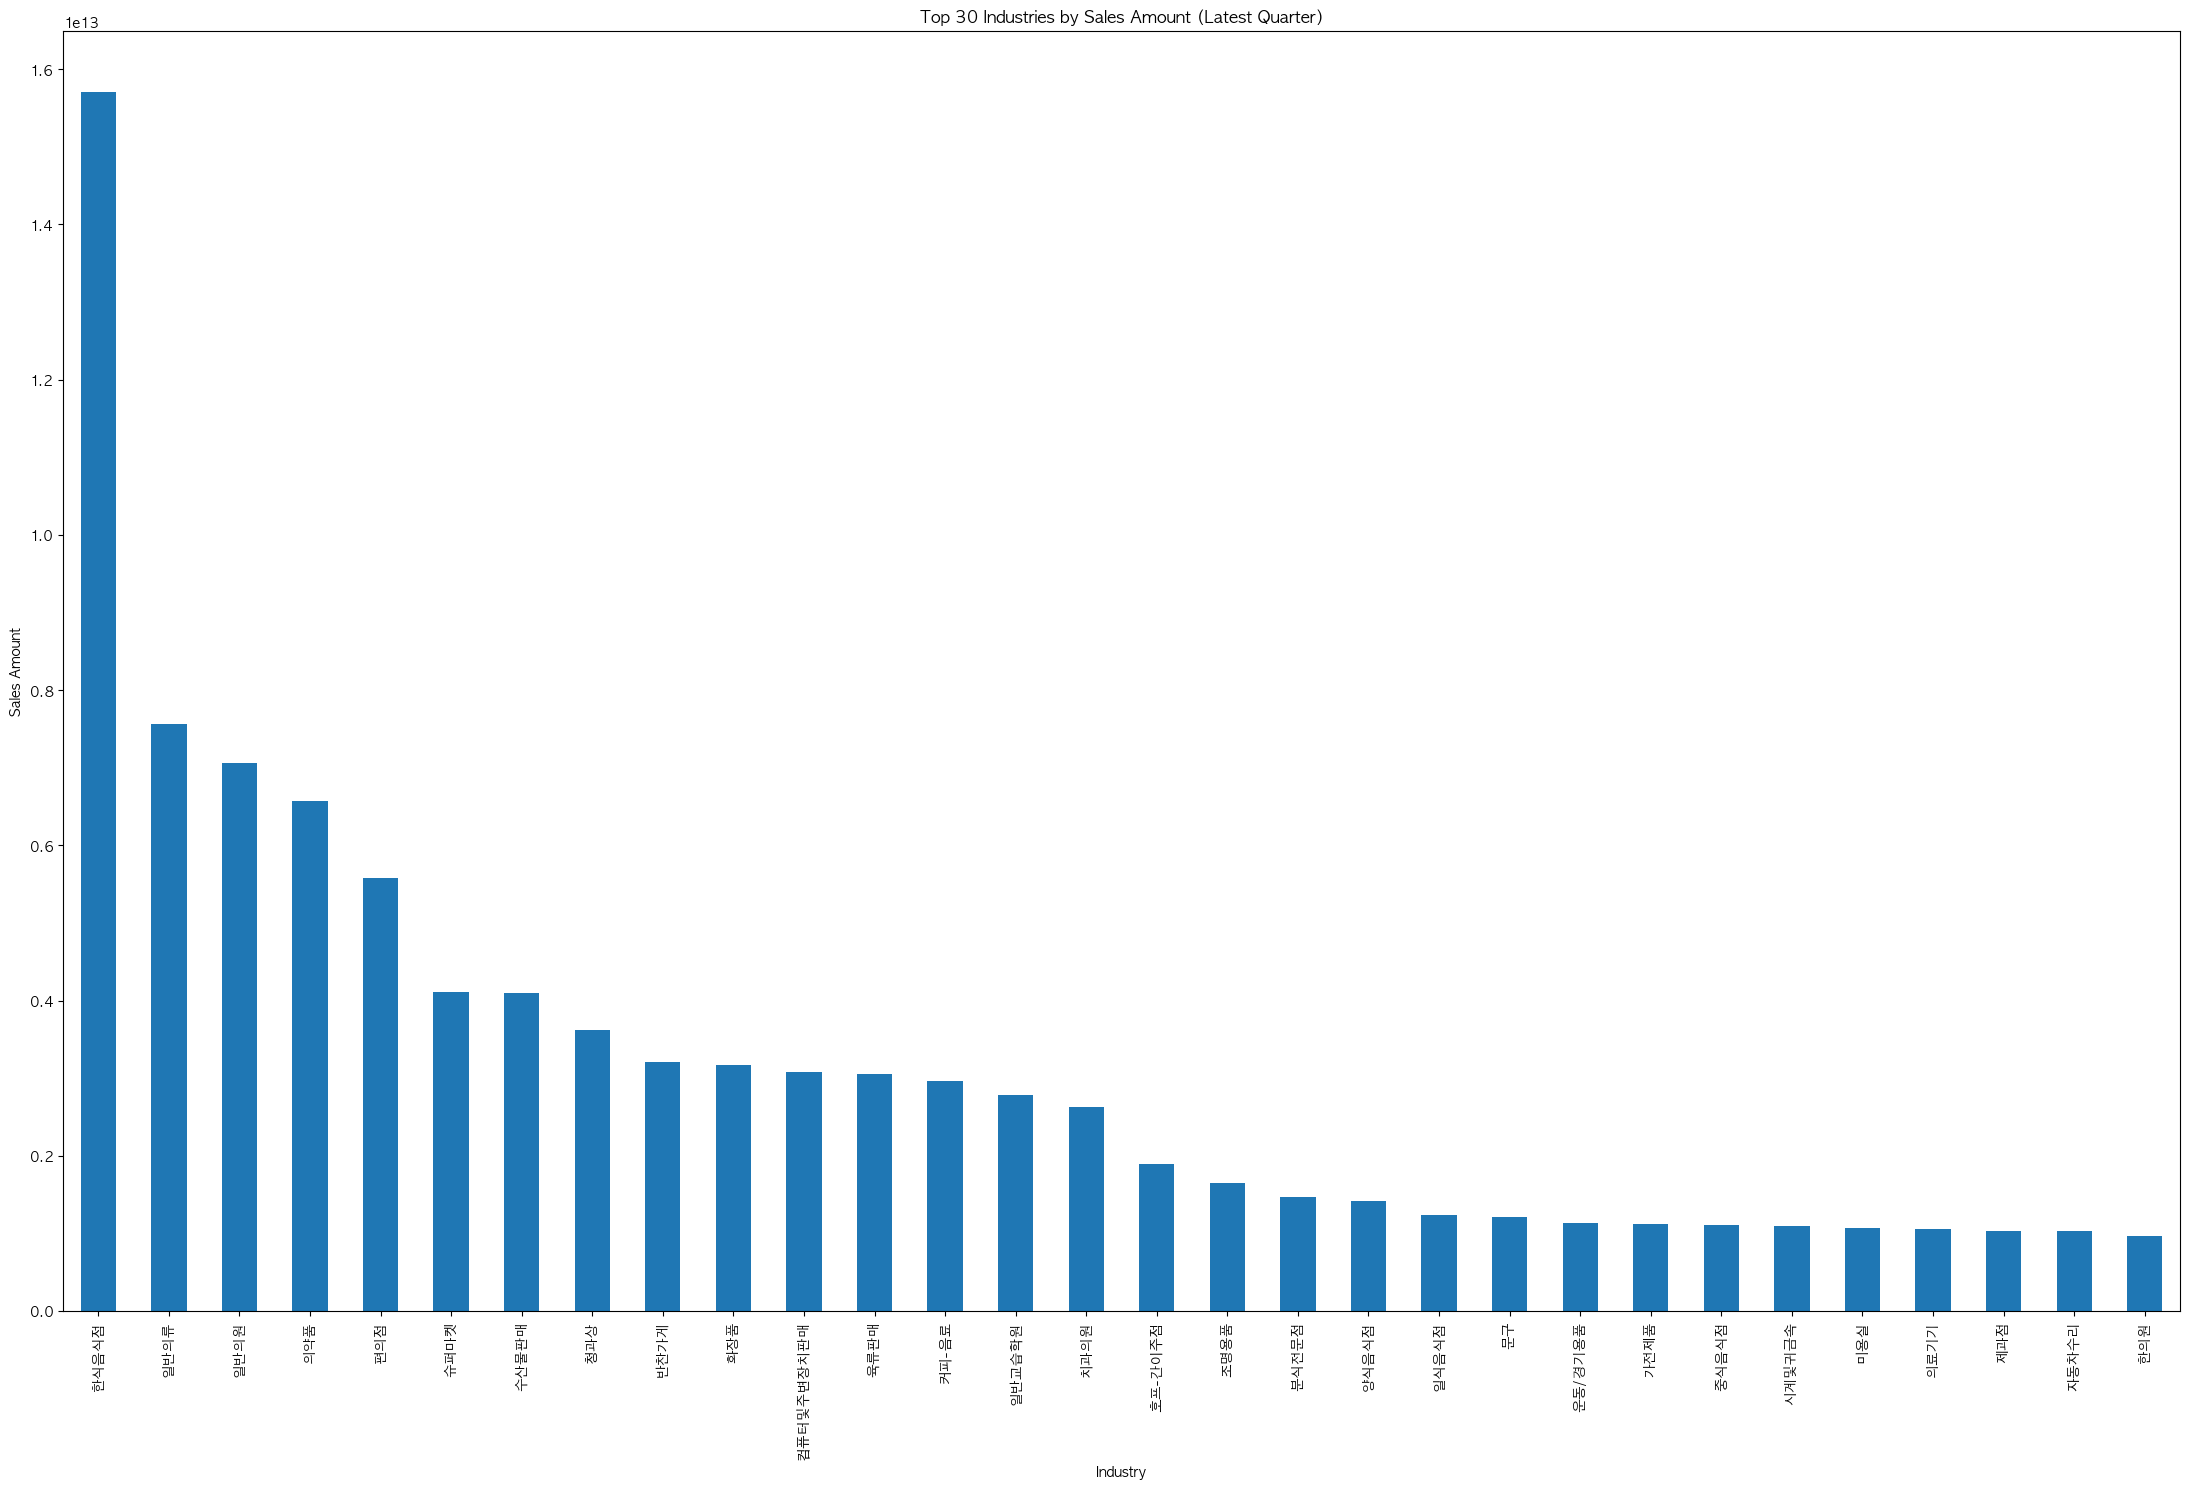

In [31]:
# 성장률 막대 그래프
plt.figure(figsize=(22, 15))
top_30_growth.plot(kind='bar')
plt.title('Top 30 Industries by Growth Rate')
plt.xlabel('Industry')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 최근 분기 매출금액 막대 그래프
plt.figure(figsize=(22, 15))
top_30_sales.plot(kind='bar')
plt.title('Top 30 Industries by Sales Amount (Latest Quarter)')
plt.xlabel('Industry')
plt.ylabel('Sales Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [1]:

# 2023년 1분기부터 2024년 2분기까지의 데이터 필터링
recent_data = data[(data['연도'] >= 2023) & (data['연도'] <= 2024) & (data['분기'] <= 2)]

# 업종별 총 매출액 계산
total_sales = recent_data.groupby('서비스_업종_코드_명')['당월_매출_금액'].sum().sort_values(ascending=False)

# 업종별 성장률 계산
first_quarter = recent_data[(recent_data['연도'] == 2023) & (recent_data['분기'] == 1)].groupby('서비스_업종_코드_명')['당월_매출_금액'].sum()
last_quarter = recent_data[(recent_data['연도'] == 2024) & (recent_data['분기'] == 2)].groupby('서비스_업종_코드_명')['당월_매출_금액'].sum()

# 모든 업종에 대해 첫 분기와 마지막 분기 데이터 확보
all_industries = list(set(first_quarter.index) | set(last_quarter.index))
growth_data = pd.DataFrame(index=all_industries, columns=['first_quarter', 'last_quarter'])
growth_data['first_quarter'] = first_quarter
growth_data['last_quarter'] = last_quarter

# 결측값을 0으로 채우기
growth_data = growth_data.fillna(0)

# 성장률 계산
growth_data['growth_rate'] = ((growth_data['last_quarter'] - growth_data['first_quarter']) / (growth_data['first_quarter'] + 1)) * 100

# 정렬 및 NaN 제거
growth_rate = growth_data['growth_rate'].sort_values(ascending=False).dropna()

# 상위 30개 업종 선정
top_30_sales = total_sales.head(30)
top_30_growth = growth_rate.head(30)

# 매출액 기준 상위 30개 업종 시각화
plt.figure(figsize=(15, 10))
sns.barplot(x=top_30_sales.index, y=top_30_sales.values)
plt.title('Top 30 Industries by Total Sales (2023 Q1 - 2024 Q2)')
plt.xticks(rotation=90)
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# 성장률 기준 상위 30개 업종 시각화
plt.figure(figsize=(15, 10))
top_30_growth.plot(kind='bar')
plt.title('Top 30 Industries by Growth Rate (2023 Q1 - 2024 Q2)')
plt.xlabel('Industry')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

NameError: name 'data' is not defined

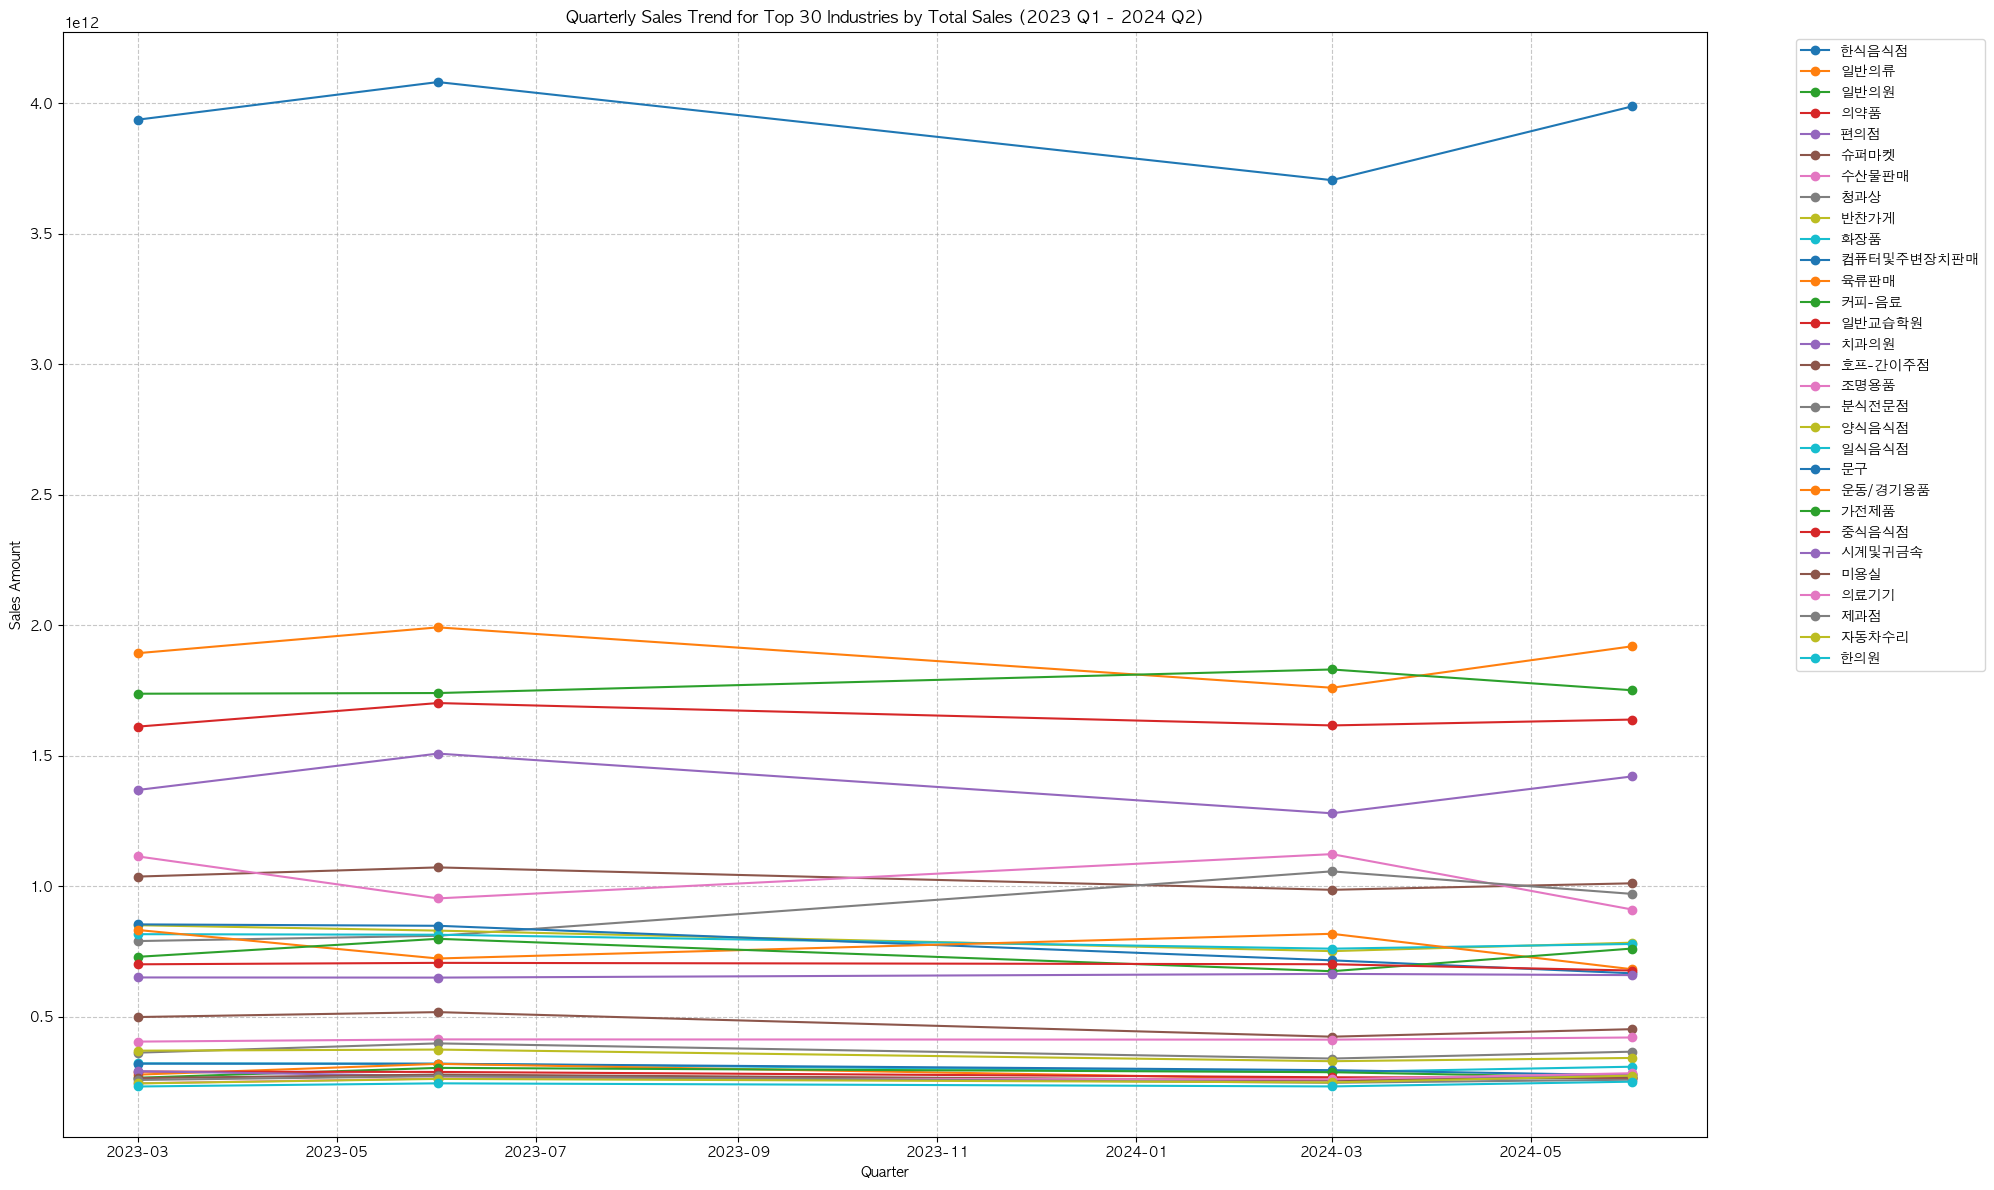

In [36]:


# 상위 30개 매출 업종 선정
top_30_sales_industries = total_sales.nlargest(30).index

# 분기별 데이터 준비
quarterly_sales = recent_data[recent_data['서비스_업종_코드_명'].isin(top_30_sales_industries)].groupby(['연도', '분기', '서비스_업종_코드_명'])['당월_매출_금액'].sum().unstack()

# 인덱스를 datetime으로 변환
quarterly_sales.index = pd.to_datetime(quarterly_sales.index.map(lambda x: f"{x[0]}-{x[1]*3}"), format='%Y-%m')

# 시각화
plt.figure(figsize=(20, 12))
for industry in top_30_sales_industries:
    plt.plot(quarterly_sales.index, quarterly_sales[industry], marker='o', label=industry)

plt.title('Quarterly Sales Trend for Top 30 Industries by Total Sales (2023 Q1 - 2024 Q2)')
plt.xlabel('Quarter')
plt.ylabel('Sales Amount')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


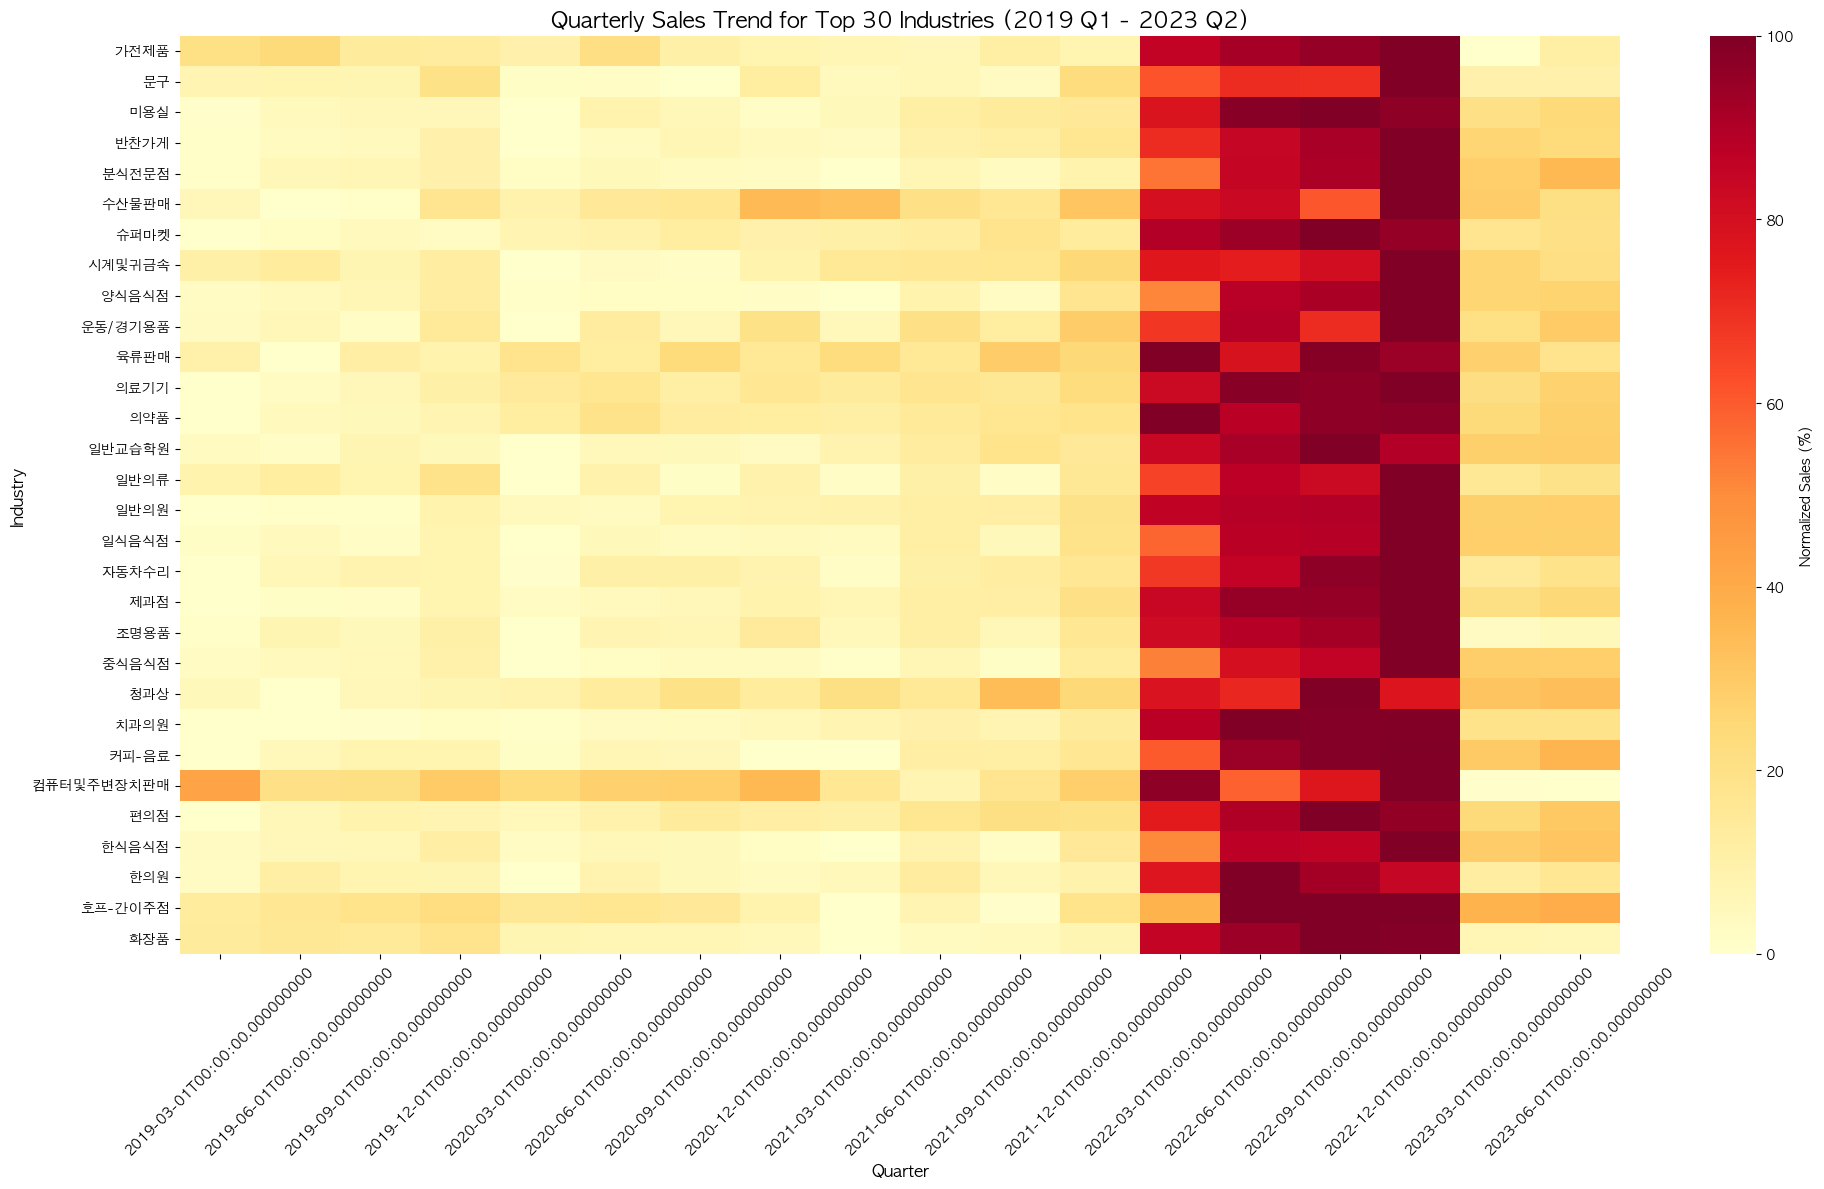

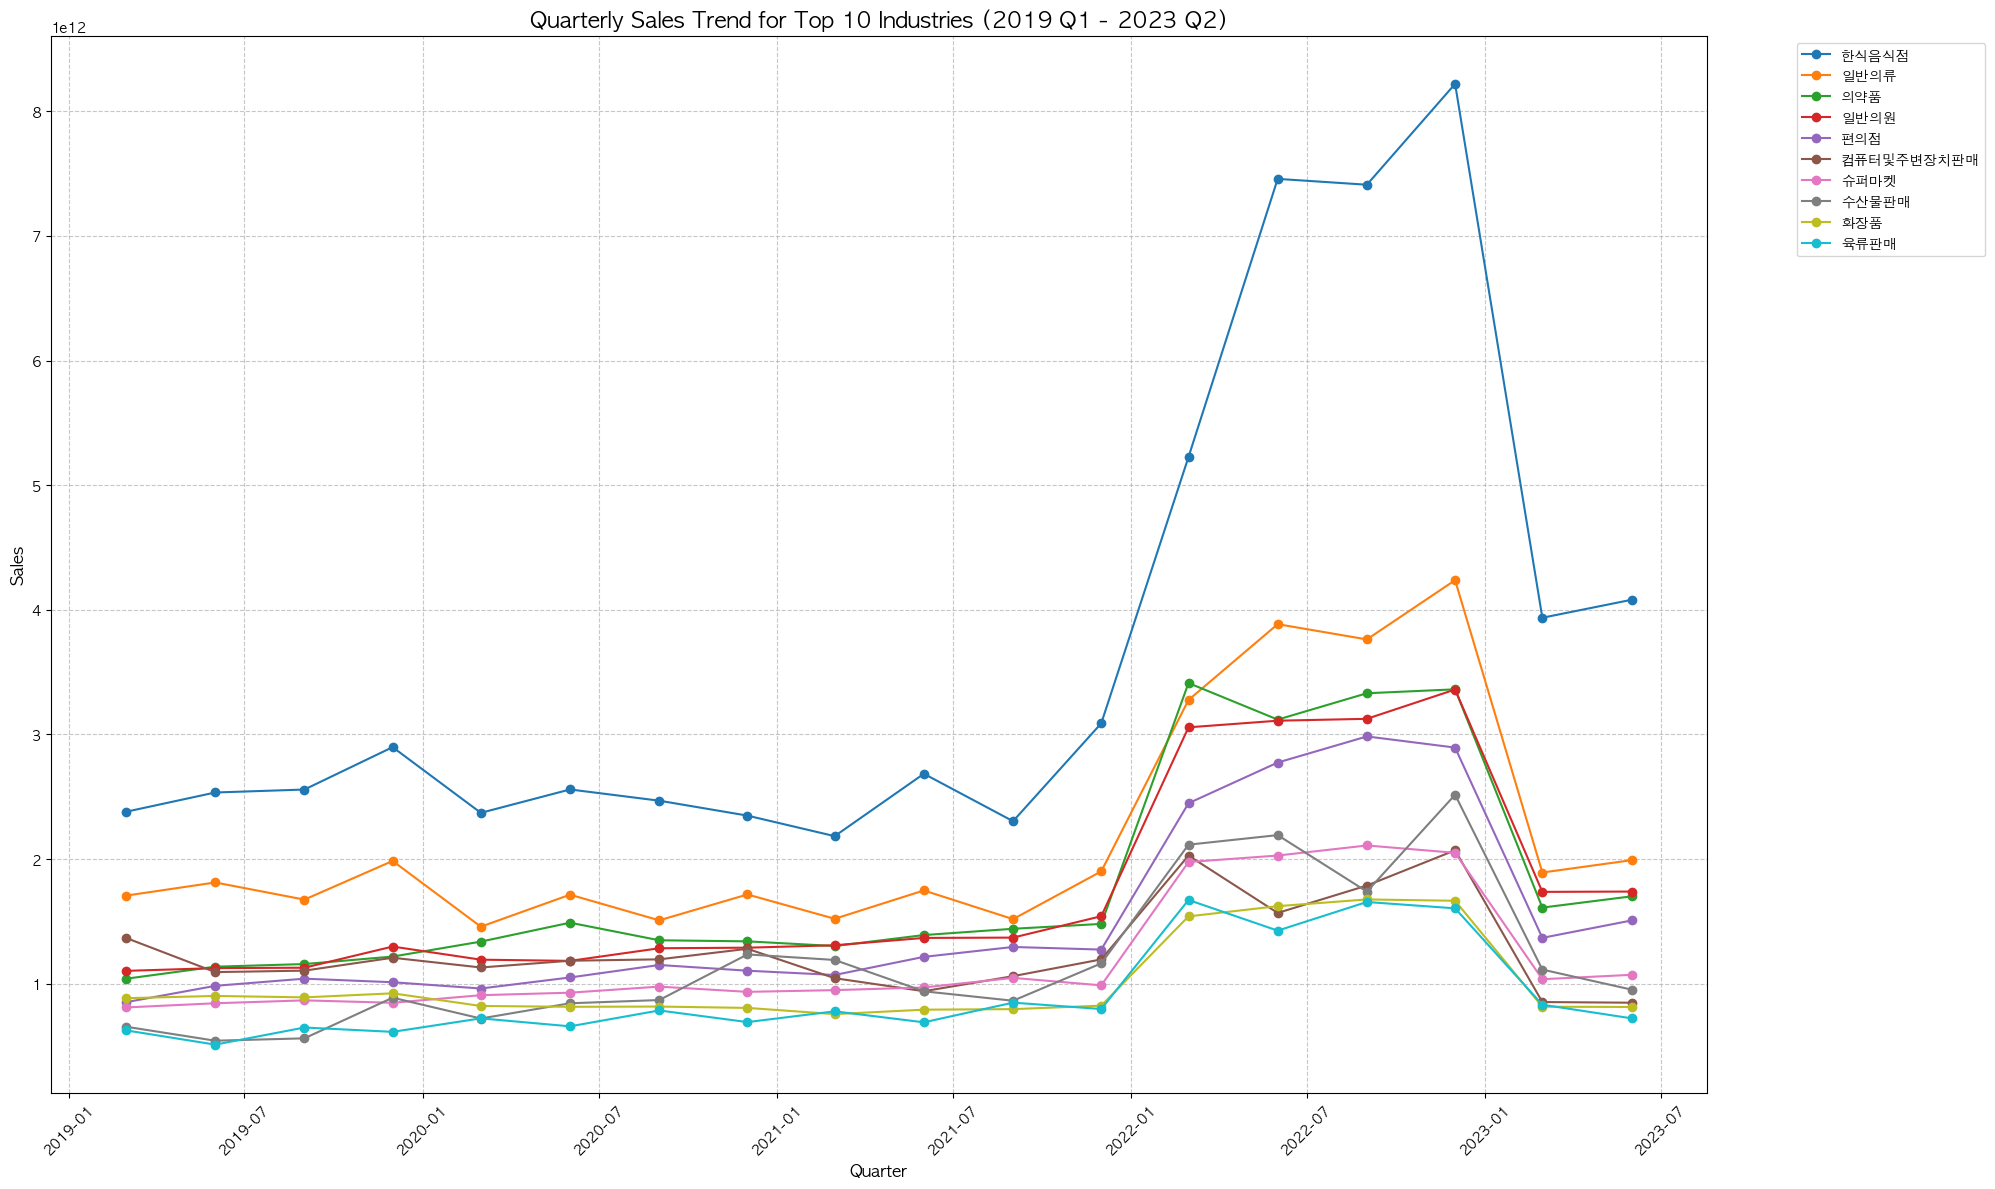

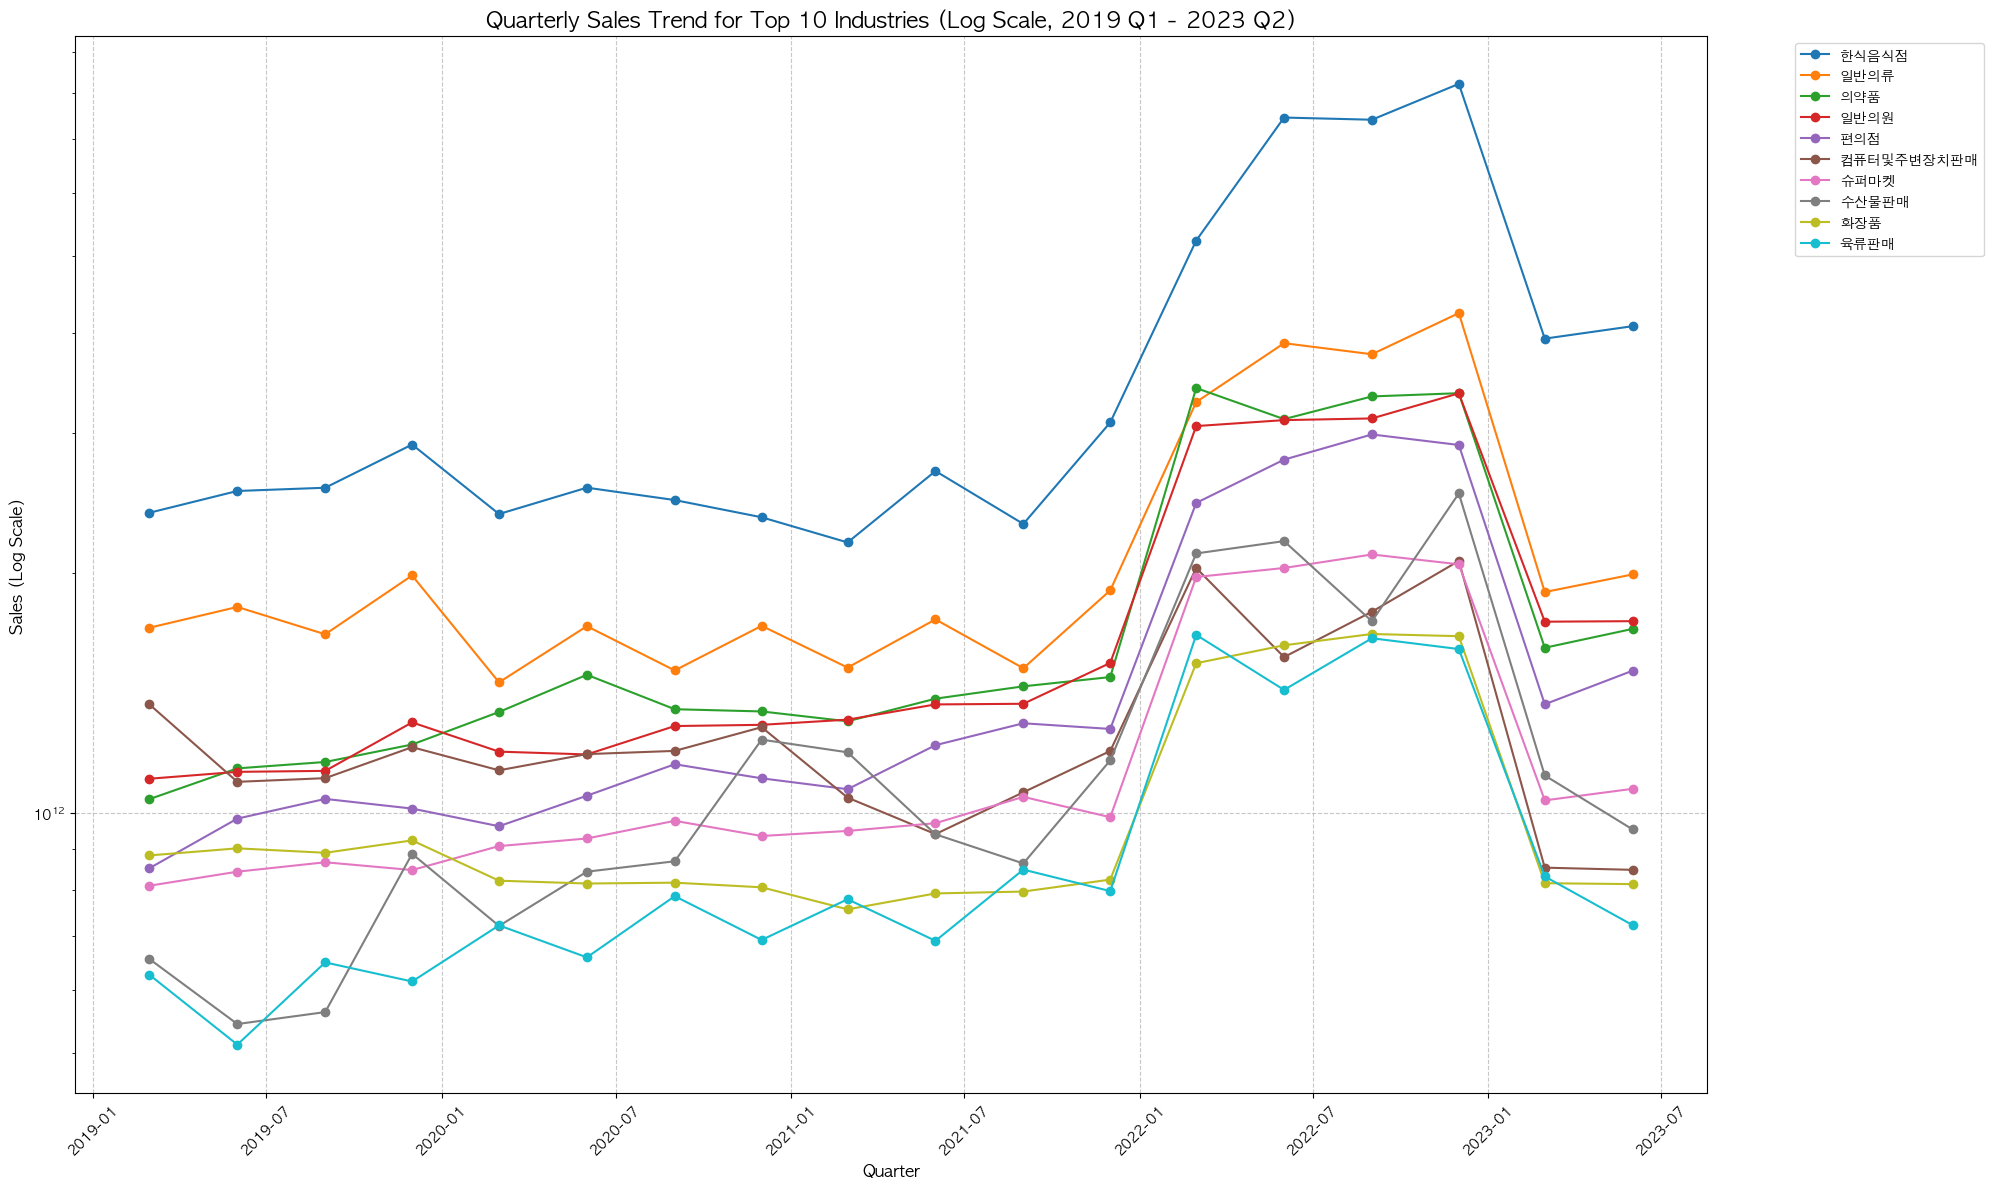

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 기준_년분기_코드를 문자열로 변환
data['기준_년분기_코드'] = data['기준_년분기_코드'].astype(str)

# 연도와 분기 분리
data['연도'] = data['기준_년분기_코드'].str[:4].astype(int)
data['분기'] = data['기준_년분기_코드'].str[4:].astype(int)

# 2019년 1분기부터 2023년 2분기까지의 데이터 필터링
filtered_data = data[(data['연도'] >= 2019) & (data['연도'] <= 2023) & 
                     ((data['연도'] < 2023) | (data['분기'] <= 2))]

# 상위 30개 매출 업종 선정
total_sales = filtered_data.groupby('서비스_업종_코드_명')['당월_매출_금액'].sum().sort_values(ascending=False)
top_30_industries = total_sales.nlargest(30).index

# 분기별 매출 데이터 준비
quarterly_sales = filtered_data[filtered_data['서비스_업종_코드_명'].isin(top_30_industries)].groupby(['연도', '분기', '서비스_업종_코드_명'])['당월_매출_금액'].sum().unstack()

# 인덱스를 datetime으로 변환
quarterly_sales.index = pd.to_datetime(quarterly_sales.index.map(lambda x: f"{x[0]}-{x[1]*3}"), format='%Y-%m')

# 데이터 정규화 (각 업종의 최대값을 100으로 설정)
normalized_sales = quarterly_sales.apply(lambda x: (x - x.min()) / (x.max() - x.min()) * 100)

# 히트맵 시각화
plt.figure(figsize=(20, 12))
sns.heatmap(normalized_sales.T, cmap='YlOrRd', cbar_kws={'label': 'Normalized Sales (%)'})

plt.title('Quarterly Sales Trend for Top 30 Industries (2019 Q1 - 2023 Q2)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# 선 그래프 시각화 (상위 10개 업종)
plt.figure(figsize=(20, 12))
for industry in top_30_industries[:10]:  # 상위 10개 업종만 표시
    plt.plot(quarterly_sales.index, quarterly_sales[industry], label=industry, marker='o')

plt.title('Quarterly Sales Trend for Top 10 Industries (2019 Q1 - 2023 Q2)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 로그 스케일 선 그래프 (선택적)
plt.figure(figsize=(20, 12))
for industry in top_30_industries[:10]:  # 상위 10개 업종만 표시
    plt.semilogy(quarterly_sales.index, quarterly_sales[industry], label=industry, marker='o')

plt.title('Quarterly Sales Trend for Top 10 Industries (Log Scale, 2019 Q1 - 2023 Q2)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales (Log Scale)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

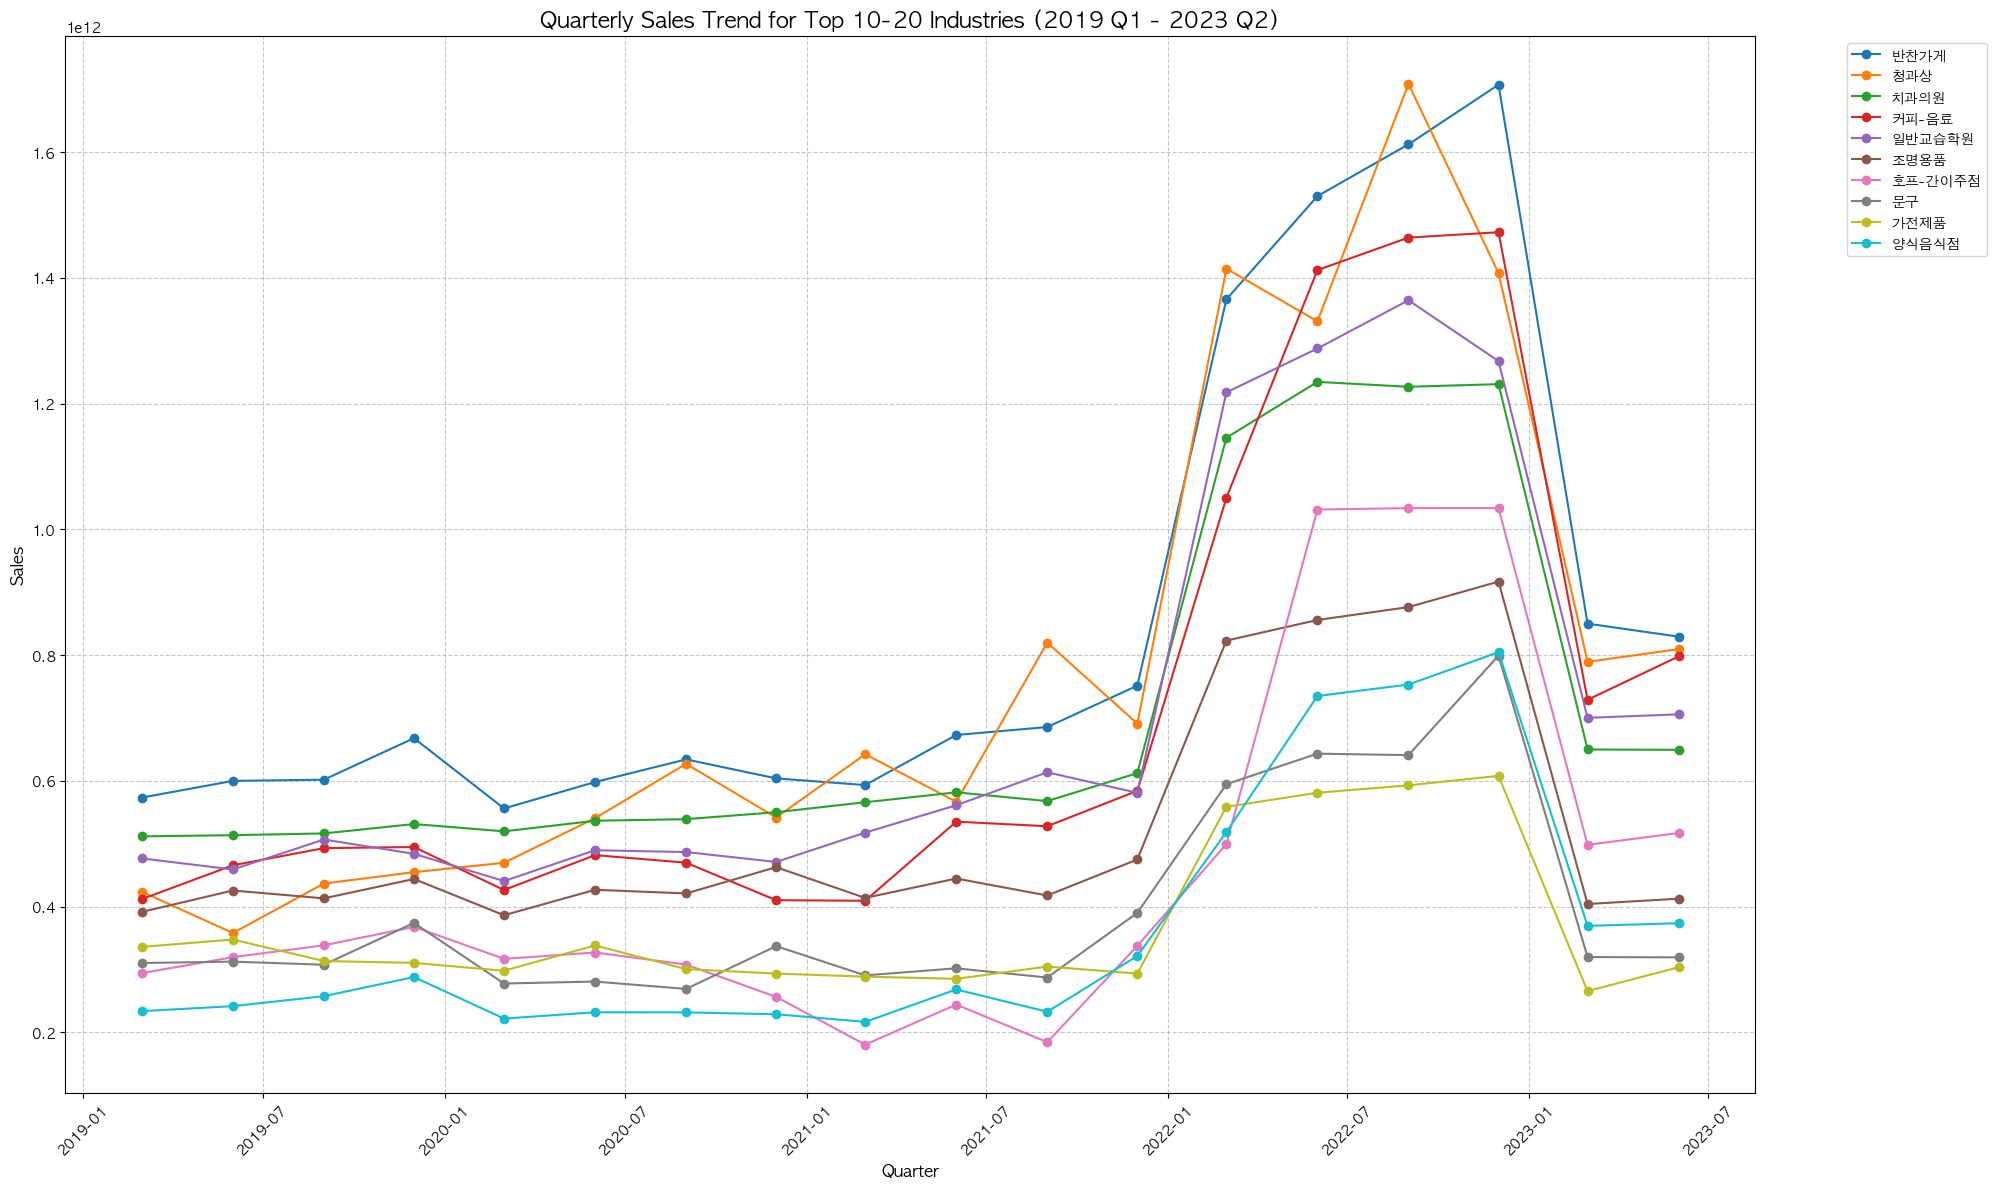

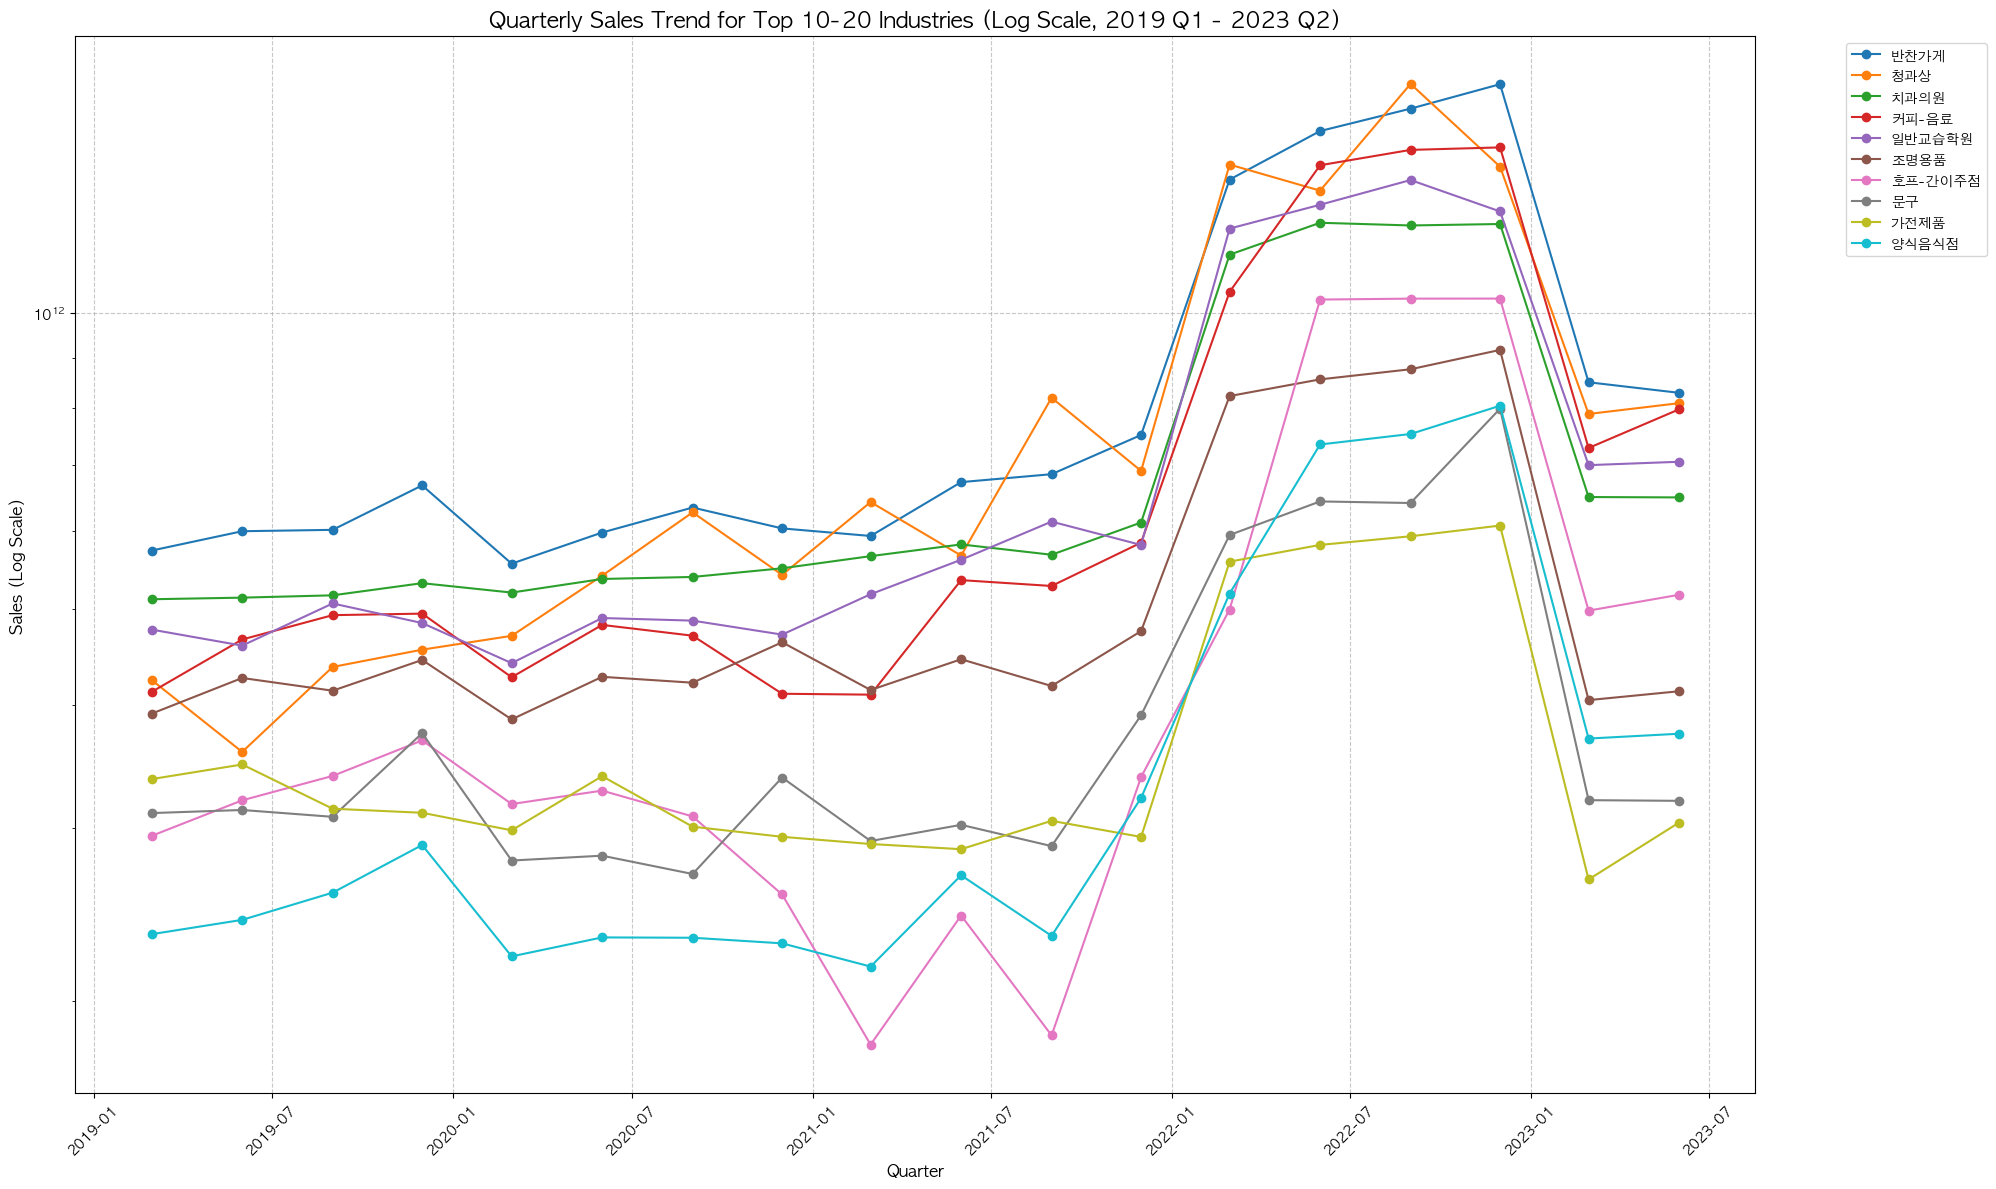

In [44]:
# 선 그래프 시각화 (상위 10-20 업종)
plt.figure(figsize=(20, 12))
for industry in top_30_industries[10:20]:  # 상위 10부터 20 업종만 표시
    plt.plot(quarterly_sales.index, quarterly_sales[industry], label=industry, marker='o')

plt.title('Quarterly Sales Trend for Top 10-20 Industries (2019 Q1 - 2023 Q2)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 로그 스케일 선 그래프 (선택적)
plt.figure(figsize=(20, 12))
for industry in top_30_industries[10:20]:  # 상위 10부터 20  업종만 표시
    plt.semilogy(quarterly_sales.index, quarterly_sales[industry], label=industry, marker='o')

plt.title('Quarterly Sales Trend for Top 10-20 Industries (Log Scale, 2019 Q1 - 2023 Q2)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales (Log Scale)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

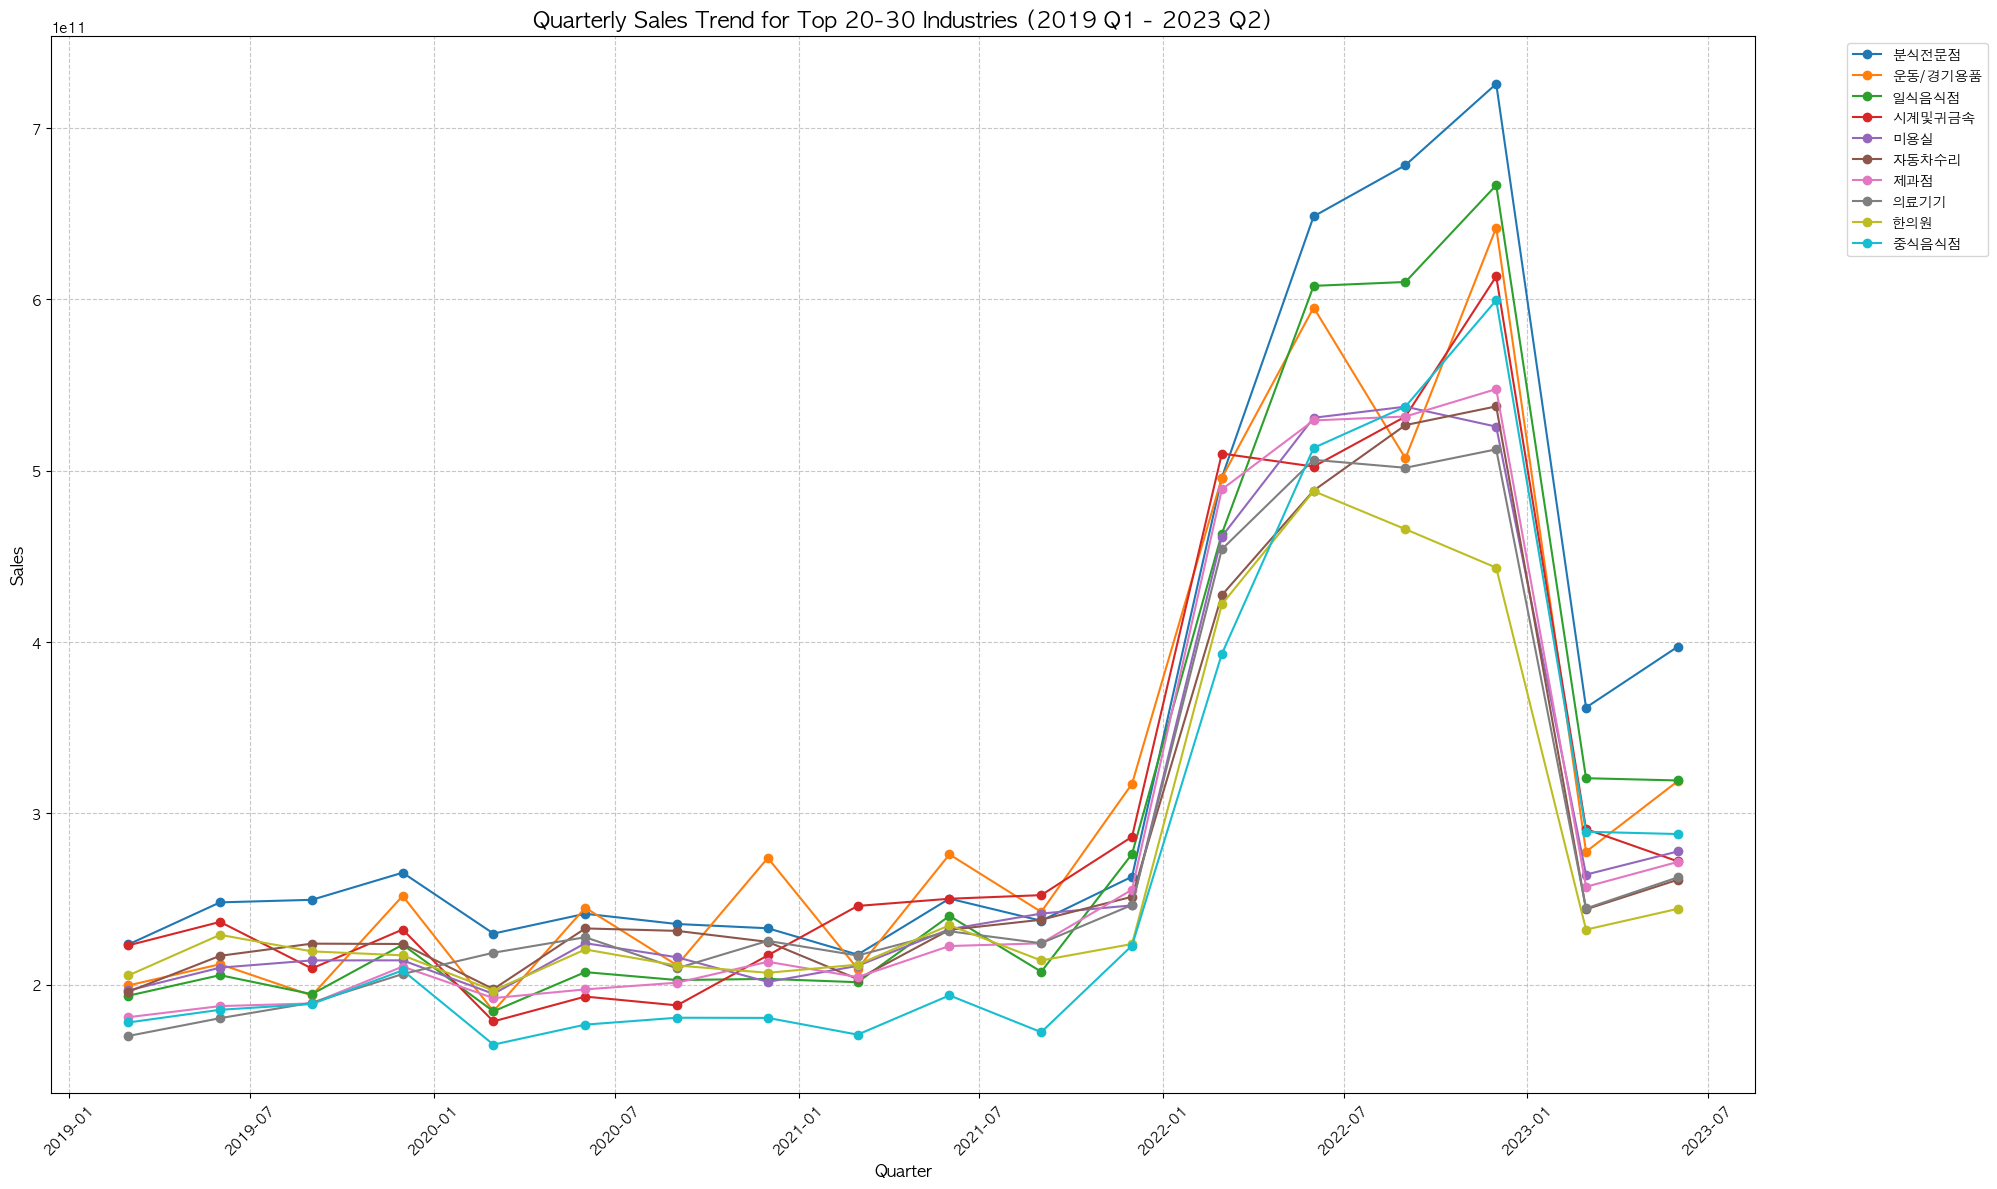

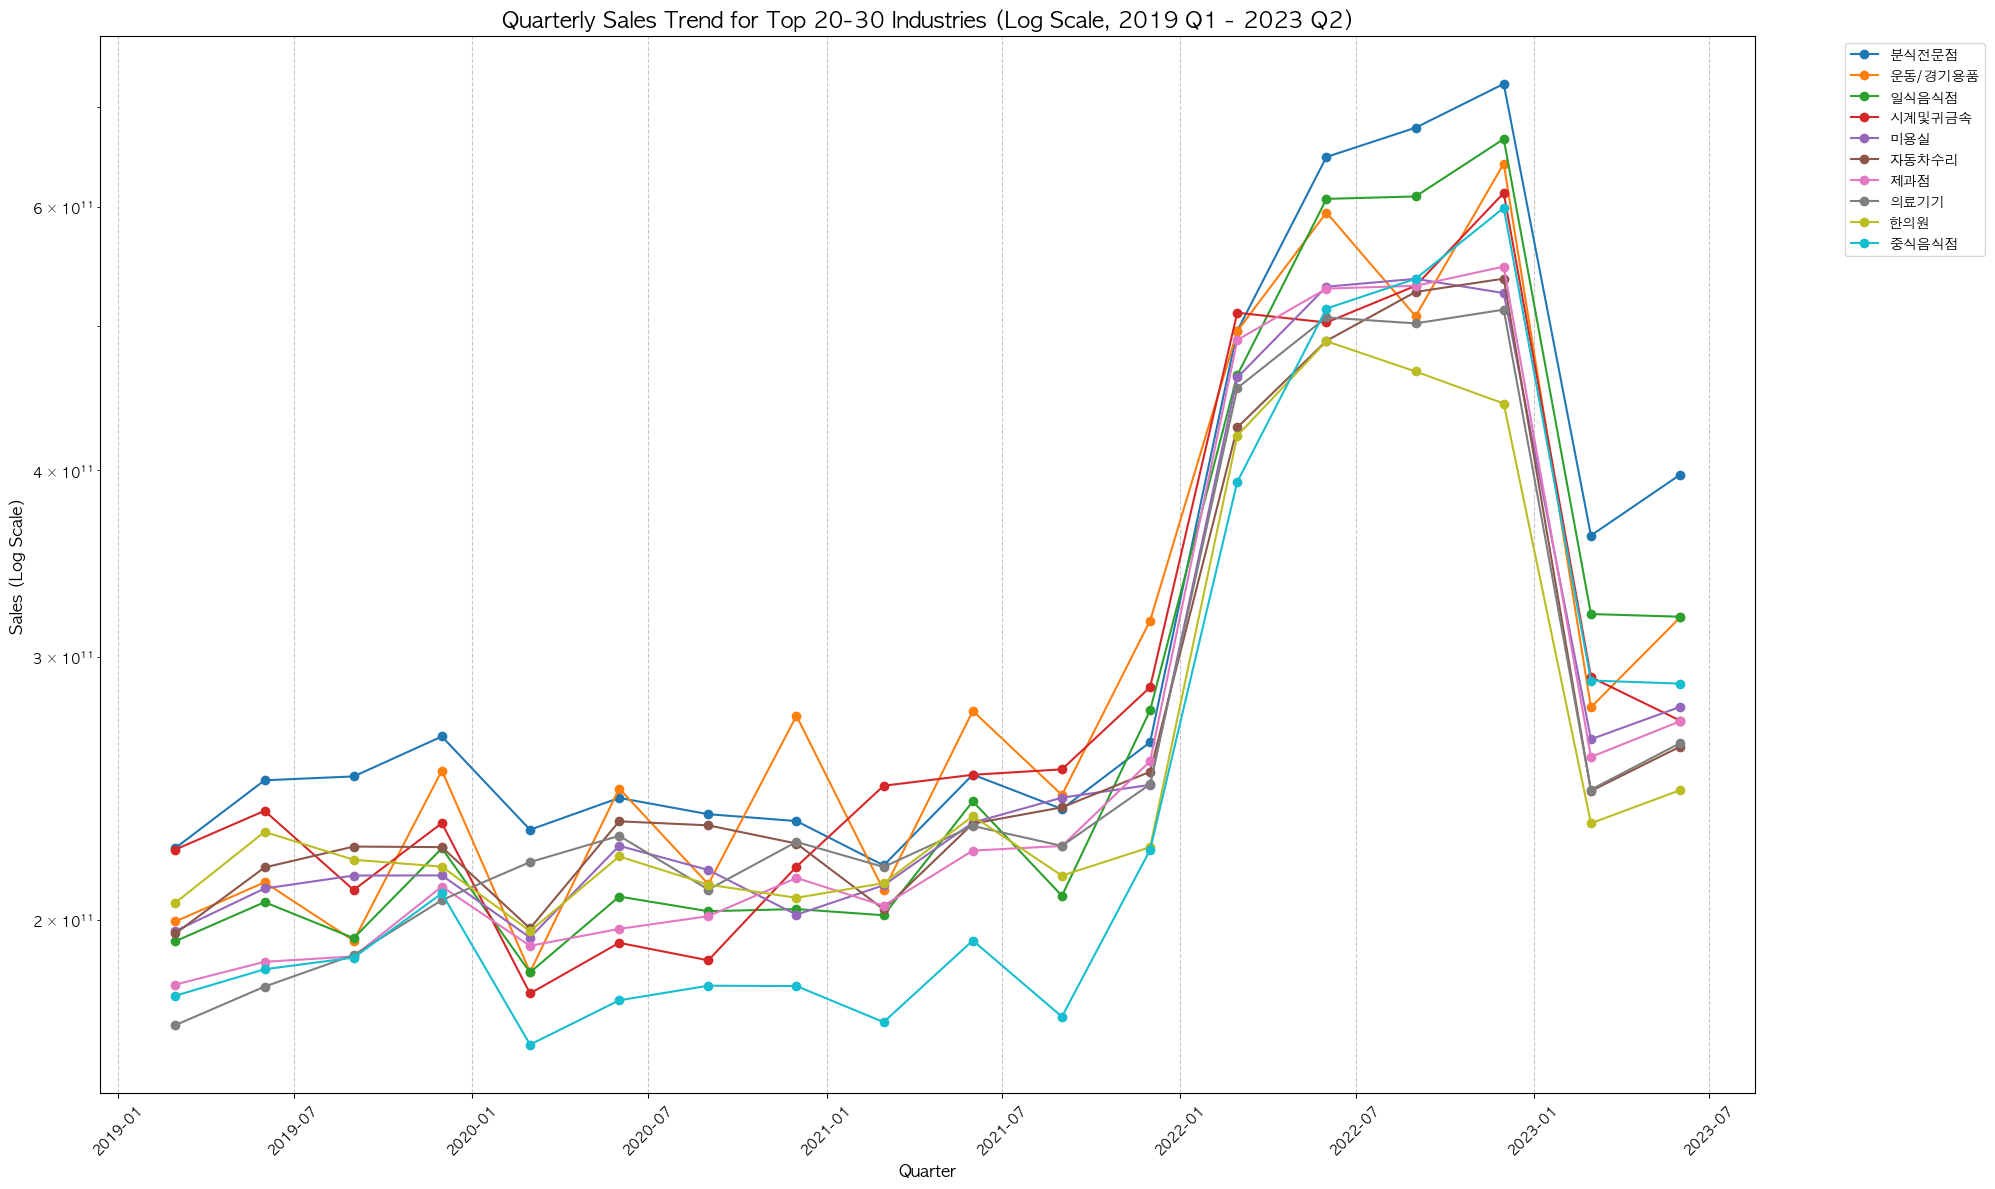

In [43]:
# 선 그래프 시각화 (상위 20-30 업종)
plt.figure(figsize=(20, 12))
for industry in top_30_industries[20:30]:  # 상위 10부터 20 업종만 표시
    plt.plot(quarterly_sales.index, quarterly_sales[industry], label=industry, marker='o')

plt.title('Quarterly Sales Trend for Top 20-30 Industries (2019 Q1 - 2023 Q2)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 로그 스케일 선 그래프 (선택적)
plt.figure(figsize=(20, 12))
for industry in top_30_industries[20:30]:  # 상위 10부터 20  업종만 표시
    plt.semilogy(quarterly_sales.index, quarterly_sales[industry], label=industry, marker='o')

plt.title('Quarterly Sales Trend for Top 20-30 Industries (Log Scale, 2019 Q1 - 2023 Q2)', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales (Log Scale)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()